In [15]:
from scipy.spatial import distance_matrix
import numpy as np
import pandas as pd
import copy as cp
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def Dados(caminho, norm = True):
    X = pd.read_csv(caminho, sep = ' ', header = None)
    if(norm):
        X = (X-X.min())/(X.max()-X.min()) # Min-Max
    return X.values

def achaCluster(ponto,clusters):
    for key in clusters:
        for pos in range(len(clusters[key])):
            if(clusters[key][pos] == ponto):
                return key
    return -1

def mergeClusters(clus, indice1, indice2):
    clusters = cp.deepcopy(clus)
    for i in range(len(clusters[indice2])):
        clusters[indice1].append(clusters[indice2][i])
    clusters.pop(indice2)
    return clusters

def newCluster(clusters, PontoA, PontoB):
    i = len(clusters)
    keys = clusters.keys()
    while(True):
        if(i not in keys):
            clusters[i] = [PontoA,PontoB]
            break
        i += 1
    return clusters

def converte(clusters, dados):
    resultado = {}
    for key in clusters:
        resultado[key] = []
        for i in range(len(clusters[key])):
            resultado[key].append(dados[clusters[key][i]])
    return resultado

In [11]:
def Hierarquico(X, k):
    dados = X.tolist()
    matrix = np.triu(distance_matrix(dados,dados))

    clusters = {}
    tamanho = 0
    while(len(clusters) != k or tamanho != len(dados)):
        Indice_min = np.where(matrix == np.min(matrix[np.nonzero(matrix)]))
        PontoA = Indice_min[0][0]
        PontoB = Indice_min[1][0]
    
        keyA = achaCluster(PontoA, clusters)
        keyB = achaCluster(PontoB, clusters)
        if(keyA == -1 and keyB == -1):
            clusters = newCluster(clusters, PontoA, PontoB)
        elif(keyA == -1):
            if(PontoA not in clusters[keyB]):
                clusters[keyB].append(PontoA)
        elif(keyB == -1):
            if(PontoB not in clusters[keyA]):
                clusters[keyA].append(PontoB)
        else:
            if(keyA != keyB):
                clusters = mergeClusters(clusters, keyA, keyB)
        
        matrix[PontoA][PontoB] = 0
        tamanho = sum(len(cluster) for cluster in clusters.values())
    
    clusters = converte(clusters, dados)
    return clusters

In [22]:
def hierarchicalPlot(clusters):
    cores = ['r','b','g','c','m','y']
    i = 0
    for key in clusters:
        cluster = np.array(clusters[key])
        plt.scatter(cluster[:,0] , cluster[:,1], s=75, color=cores[i],  edgecolor='k', label='cluster '+str(i))
        i+= 1
    plt.legend(scatterpoints=1)
    plt.show()

In [14]:
X = Dados('cluster.dat',norm = True)
clusters = Hierarquico(X, 3)

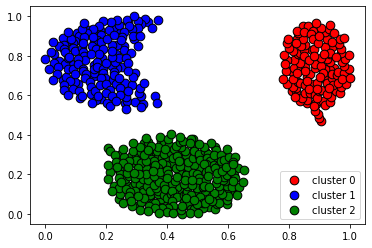

In [23]:
hierarchicalPlot(clusters)